In [ ]:
from google.colab import drive
import zipfile
import os

# Google Drive'ı bağlama
drive.mount('/content/drive')

# Dosyanın yolu
zip_path = '/content/drive/MyDrive/parmakizi.zip'

# Zip dosyasını çıkartma
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/parmakizi')

# Dosya yapısını kontrol etme
data_dir = '/content/parmakizi'
print("Veri dizini içeriği:", os.listdir(data_dir))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri dizini içeriği: ['train', 'test']


In [ ]:
import numpy as np
import os
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Görüntü yüklendi.


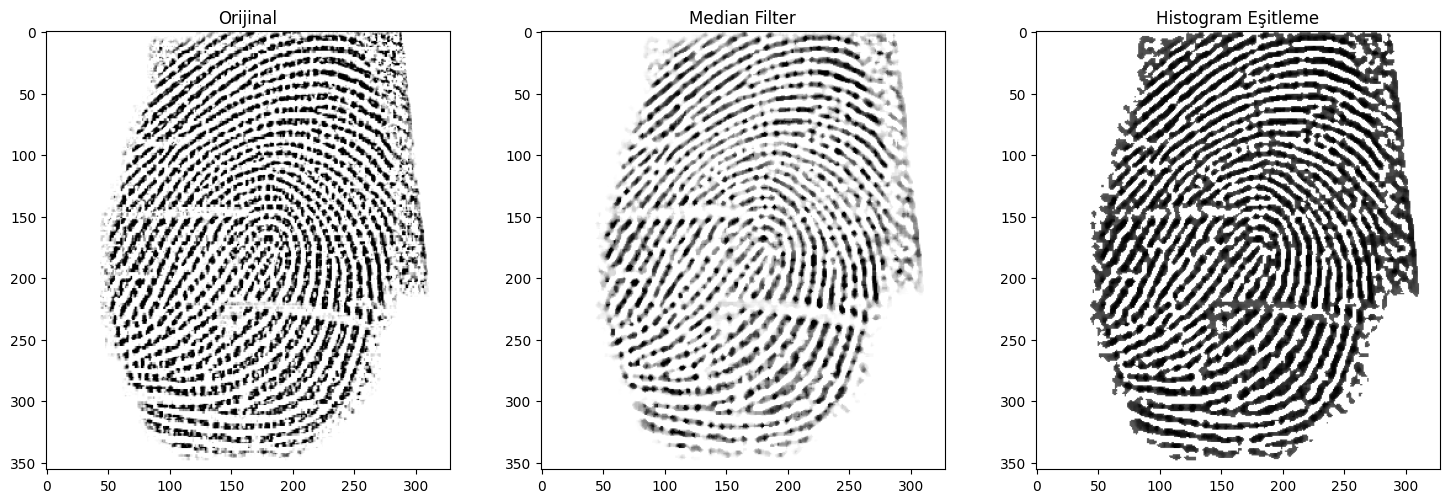

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Görüntü yolunu kontrol et
image_path = '/content/parmakizi/train/1/1_1.jpg'

if os.path.exists(image_path):
    # Görüntü gri tonlamalı olarak yükleniyor
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        print("Görüntü yüklendi.")

        # Median Filter uygulama (Gürültüyü azaltmak için)
        median_filtered = cv2.medianBlur(image, 5)

        # Histogram Eşitleme uygulama
        equalized = cv2.equalizeHist(median_filtered)

        # Görüntüler gösteriliyor
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(image, cmap='gray')
        axs[0].set_title("Orijinal")

        axs[1].imshow(median_filtered, cmap='gray')
        axs[1].set_title("Median Filter")

        axs[2].imshow(equalized, cmap='gray')
        axs[2].set_title("Histogram Eşitleme")

        plt.tight_layout()
        plt.show()
    else:
        print("Görüntü bozuk veya yüklenemedi.")
else:
    print("Dosya yolu hatalı, görüntü bulunamadı.")

In [ ]:
import os

train_dir = '/content/parmakizi/train'
test_dir = '/content/parmakizi/test'
print("Train klasöründe bulunan alt klasörler:", os.listdir(train_dir))
# Klasörleri sayısal olarak sırala
class_names = sorted(os.listdir(train_dir), key=lambda x: int(x))
print("Sayısal olarak sıralanmış sınıflar:", class_names)


Train klasöründe bulunan alt klasörler: ['90', '162', '49', '128', '65', '334', '316', '258', '10', '274', '50', '18', '229', '140', '263', '8', '264', '224', '47', '93', '257', '272', '25', '152', '265', '276', '304', '99', '159', '69', '34', '46', '230', '289', '22', '121', '80', '94', '98', '232', '142', '9', '164', '52', '195', '37', '42', '278', '40', '73', '24', '188', '120', '293', '320', '124', '217', '89', '321', '67', '23', '277', '183', '108', '3', '260', '171', '12', '144', '2', '311', '30', '235', '62', '294', '148', '325', '61', '1', '92', '181', '205', '307', '271', '119', '246', '139', '112', '11', '300', '57', '147', '127', '222', '196', '56', '88', '136', '301', '33', '68', '179', '335', '168', '64', '32', '78', '213', '285', '165', '60', '74', '83', '4', '97', '322', '149', '14', '303', '72', '198', '141', '177', '227', '187', '226', '151', '175', '189', '266', '20', '116', '7', '146', '206', '41', '267', '182', '286', '254', '236', '184', '241', '270', '130', '287',

In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.utils import to_categorical

def load_filtered_data(data_dir, img_size=(128, 128)):
    X, y = [], []
    # Sınıf adlarını sayısal olarak sırala
    class_names = sorted(os.listdir(data_dir), key=lambda x: int(x))

    print("Sıralanmış Sınıf Adları:", class_names)  # Kontrol etmek için yazdır

    class_map = {class_name: idx for idx, class_name in enumerate(class_names)}
    print("Sınıf Haritası:", class_map)

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                # Median Filter uygula
                median_filtered = cv2.medianBlur(image, 5)

                # Histogram Eşitleme uygula
                equalized_img = cv2.equalizeHist(median_filtered)

                # Resim boyutlandır
                resized_img = cv2.resize(equalized_img, img_size)
                X.append(resized_img)
                y.append(class_map[class_name])
            else:
                print(f"Hatalı dosya atlandı: {img_path}")

    X = np.array(X).reshape(-1, img_size[0], img_size[1], 1)
    y = to_categorical(y, num_classes=len(class_names))
    return X, y


In [ ]:
train_dir = '/content/parmakizi/train'  # Eğitim veri klasörünün yolu
test_dir = '/content/parmakizi/test'    # Test veri klasörünün yolu

# load_filtered_data fonksiyonuyla verileri yükle
X_train, y_train = load_filtered_data(train_dir)
X_test, y_test = load_filtered_data(test_dir)

# Yüklenen veri boyutlarını kontrol et
print(f"Eğitim verisi şekli: {X_train.shape}, Etiket şekli: {y_train.shape}")
print(f"Test verisi şekli: {X_test.shape}, Etiket şekli: {y_test.shape}")


Sıralanmış Sınıf Adları: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155

In [ ]:
# Eğitim veri klasörünün içeriğini kontrol et
print("Train klasöründe bulunan alt klasörler:", os.listdir(train_dir))

# Test olarak load_filtered_data çağrısı
X_train, y_train = load_filtered_data(train_dir)
print(f"X_train boyutu: {X_train.shape}")
print(f"Y_train boyutu: {y_train.shape}")


Train klasöründe bulunan alt klasörler: ['90', '162', '49', '128', '65', '334', '316', '258', '10', '274', '50', '18', '229', '140', '263', '8', '264', '224', '47', '93', '257', '272', '25', '152', '265', '276', '304', '99', '159', '69', '34', '46', '230', '289', '22', '121', '80', '94', '98', '232', '142', '9', '164', '52', '195', '37', '42', '278', '40', '73', '24', '188', '120', '293', '320', '124', '217', '89', '321', '67', '23', '277', '183', '108', '3', '260', '171', '12', '144', '2', '311', '30', '235', '62', '294', '148', '325', '61', '1', '92', '181', '205', '307', '271', '119', '246', '139', '112', '11', '300', '57', '147', '127', '222', '196', '56', '88', '136', '301', '33', '68', '179', '335', '168', '64', '32', '78', '213', '285', '165', '60', '74', '83', '4', '97', '322', '149', '14', '303', '72', '198', '141', '177', '227', '187', '226', '151', '175', '189', '266', '20', '116', '7', '146', '206', '41', '267', '182', '286', '254', '236', '184', '241', '270', '130', '287',

In [ ]:
# Gri tonlamalı veriyi 3 kanallı hale getir
X_train_resized = np.repeat(X_train, 3, axis=-1)
X_test_resized = np.repeat(X_test, 3, axis=-1)

print(f"RGB Eğitim veri boyutu: {X_train_resized.shape}")
print(f"RGB Test veri boyutu: {X_test_resized.shape}")


RGB Eğitim veri boyutu: (1680, 128, 128, 3)
RGB Test veri boyutu: (336, 128, 128, 3)


In [ ]:
from tensorflow.keras.models import load_model

# Model dosyasının yolunu belirleyin
model_path = '/content/drive/My Drive/fingerprint_model_resnet50.h5'
model = load_model(model_path)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# ResNet50 modelini yükle (ImageNet ağırlıkları ile)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Base modelin katmanlarını dondur
for layer in base_model.layers:
    layer.trainable = False

# Yeni katmanlar ekle
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(y_train.shape[1], activation='softmax')(x)  # Sınıf sayısı kadar nöron

# Modeli oluştur
model = Model(inputs=base_model.input, outputs=predictions)

# Modeli derle
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,809,168 (94.64 MB)

 Trainable params: 1,221,456 (4.66 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.callbacks import Callback

class EpochHistory(Callback):
    def __init__(self):
        super().__init__()
        self.epoch_data = []

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = epoch
        self.epoch_data.append(logs)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.save('fingerprint_model_resnet50_new.keras')
print("Model başarıyla kaydedildi.")

# Callback örneği oluştur
epoch_history = EpochHistory()
# Modeli eğit
history = model.fit(
    X_train_resized, y_train,
    epochs=80,  # Eğitim için tam epoch sayısı
    batch_size=32,
    callbacks=[epoch_history]
)
model.save('fingerprint_model_resnet50_new.keras')
print("Model başarıyla kaydedildi.")


Model başarıyla kaydedildi.
Epoch 1/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.0191 - loss: 5.4761 - epoch: 0.0000e+00
Epoch 2/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.0511 - loss: 4.9661 - epoch: 1.0000
Epoch 3/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.0785 - loss: 4.5582 - epoch: 2.0000
Epoch 4/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.1174 - loss: 4.1648 - epoch: 3.0000
Epoch 5/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.1171 - loss: 3.8921 - epoch: 4.0000
Epoch 6/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.1684 - loss: 3.4846 - epoch: 5.0000
Epoch 7/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.2023 - loss: 3.3457 - epoch: 6.0000
Epoch 8/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.2103 - loss: 3.1897 - epoch: 7.0000
Epoch 9/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.2638 - loss: 2.9276 - epoch: 8.0000
Epoch 10/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accur

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Eğitilmiş modeli kaydet
model.save('fingerprint_model_resnet50.keras')
print("Model başarıyla kaydedildi.")


Model başarıyla kaydedildi.


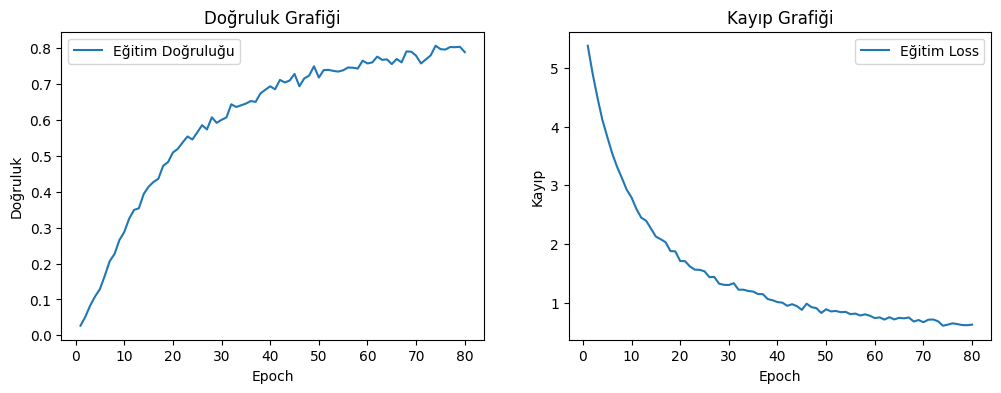

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğunu çiz
epochs = range(1, len(epoch_history.epoch_data) + 1)

train_acc = [log['accuracy'] for log in epoch_history.epoch_data]
train_loss = [log['loss'] for log in epoch_history.epoch_data]

# Doğruluk grafiği
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Eğitim Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Loss grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Eğitim Loss')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test_resized, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6992 - loss: 1.3071
Test Loss: 1.5054
Test Accuracy: 0.6815


11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
Accuracy: 0.6815
Precision: 0.5871
Recall: 0.6815
F1 Score: 0.6163


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


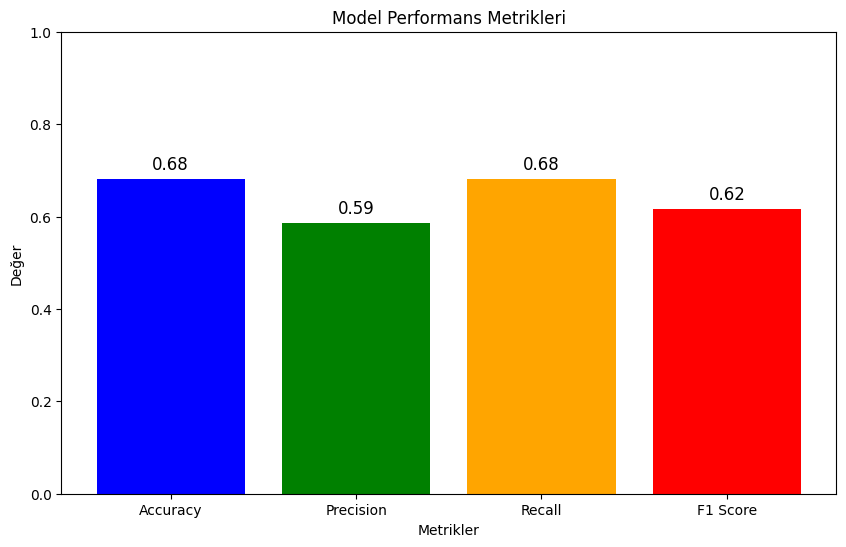

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         1
          13       0.50      1.00      0.67         1
          14       0.50      1.00      0.67         1
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Tahminler yap
predictions = model.predict(X_test_resized)
predicted_classes = np.argmax(predictions, axis=1) + 1  # Tahminleri 1 tabanlı yap
true_classes = np.argmax(y_test, axis=1) + 1  # Gerçek etiketleri 1 tabanlı yap

# Performans metriklerini hesapla
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Metrikleri görselleştir
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('Model Performans Metrikleri')
plt.ylabel('Değer')
plt.xlabel('Metrikler')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

# Detaylı sınıflandırma raporu
report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(1, 337)])
print(report)


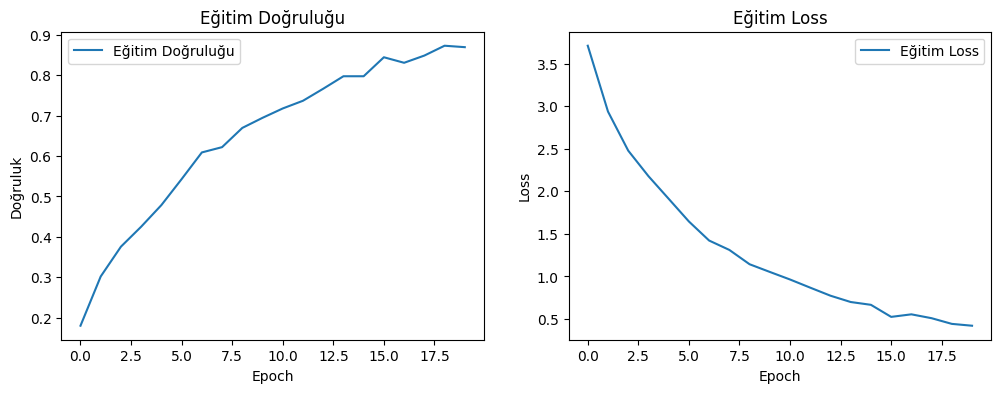

In [ ]:
plt.figure(figsize=(12, 4))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.title('Eğitim Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Loss grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Loss')
plt.title('Eğitim Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step


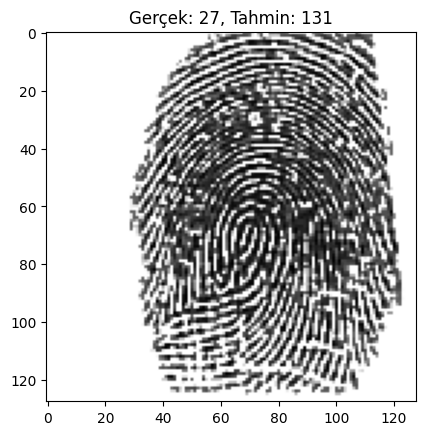

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tahminler yap
predictions = model.predict(X_test_resized)
predicted_classes = np.argmax(predictions, axis=1) + 1  # Tahminleri 1 tabanlı yap
true_classes = np.argmax(y_test, axis=1) + 1  # Gerçek etiketleri 1 tabanlı yap

# Yanlış tahminleri bul
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Bazı yanlış tahminleri görselleştir
for i in incorrect_indices[:5]:  # İlk 5 yanlış tahmini gör
    plt.imshow(X_test_resized[i], cmap='gray')
    plt.title(f"Gerçek: {true_classes[i]}, Tahmin: {predicted_classes[i]}")
    plt


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np



11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step
Accuracy: 0.7530
Precision: 0.6820
Recall: 0.7530
F1 Score: 0.7054


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


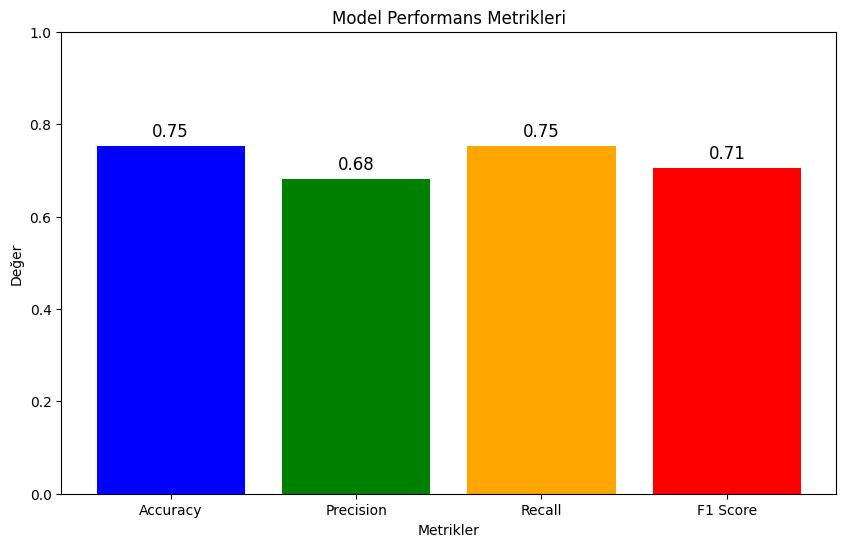

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       0.50      1.00      0.67         1
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         1
          16       0.50      1.00      0.67         1
          17       1.00      1.00      1.00         1
          18       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Tahminler yap
predictions = model.predict(X_test_resized)
predicted_classes = np.argmax(predictions, axis=1) + 1  # Tahminleri 1 tabanlı yap
true_classes = np.argmax(y_test, axis=1) + 1  # Gerçek etiketleri 1 tabanlı yap

# Performans metriklerini hesapla
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Metrikleri görselleştir
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('Model Performans Metrikleri')
plt.ylabel('Değer')
plt.xlabel('Metrikler')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

# Detaylı sınıflandırma raporu
report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(1, 337)])
print(report)


In [ ]:
!pip install pydot
!pip install graphviz


In [ ]:
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
